### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Loading Data

In [3]:
data = pd.read_csv("land_price_2.csv")

### Dependent and Independent Variable

In [5]:
x = data["land_area"]
y = data['price']

### Visualize Data

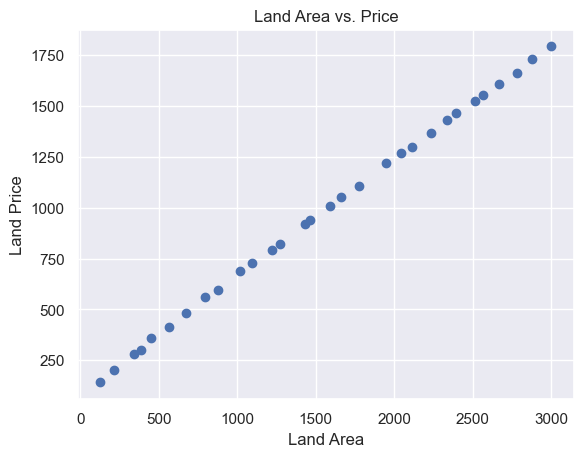

In [6]:
plt.scatter(x, y)
plt.xlabel("Land Area")
plt.ylabel("Land Price")
plt.title("Land Area vs. Price")
plt.show()

### Modeling

In [19]:
# Hypothesis Function
def hypothesis(x, a1, a2, b):
    return b + a1 * x + a2 * np.sqrt(x)

# Cost Function
def compute_cost(x, y, a1, a2, b):
    m = len(y)
    total_cost = sum((hypothesis(x[i], a1, a2, b) - y[i])**2 for i in range(m))
    return total_cost/m

# Gradient Descent
def compute_gradient(x, y, a1, a2, b):
     m = len(y)
     dJ_da1 = sum((hypothesis(x[i], a1, a2, b) - y[i]) * x[i] for i in range(m)) * 2 / m
     dJ_da2 = sum((hypothesis(x[i], a1, a2, b) - y[i]) * np.sqrt(x[i]) for i in range(m)) * 2 / m
     dJ_db = sum((hypothesis(x[i], a1, a2, b) - y[i]) for i in range(m)) * 2 / m
     return dJ_da1, dJ_da2, dJ_db

# Training
alpha = 1e-8
epochs = 500
cost_history = []
a1, a2, b = 0, 0, 0
for epoch in range(epochs):
    cost_value = compute_cost(x, y, a1, a2, b)
    cost_history.append(cost_value)
    dJ_da1, dJ_da2, dJ_db = compute_gradient(x, y, a1, a2, b)
    a1 -= alpha * dJ_da1
    a2 -= alpha * dJ_da2
    b -= alpha * dJ_db
    if epoch % 50 == 0:
        print(f"Epoch {epoch}: Cost = {cost_value:.4f}, a1 = {a1:.4f}, a2 = {a2:.4f}, b = {b:.4f}")

Epoch 0: Cost = 1199843.3720, a1 = 0.0388, a2 = 0.0009, b = 0.0000
Epoch 50: Cost = 3978.7266, a1 = 0.5944, a2 = 0.0133, b = 0.0003
Epoch 100: Cost = 2180.0746, a1 = 0.6159, a2 = 0.0141, b = 0.0003
Epoch 150: Cost = 2177.1036, a1 = 0.6168, a2 = 0.0145, b = 0.0004
Epoch 200: Cost = 2176.8330, a1 = 0.6168, a2 = 0.0149, b = 0.0004
Epoch 250: Cost = 2176.5665, a1 = 0.6168, a2 = 0.0152, b = 0.0004
Epoch 300: Cost = 2176.3001, a1 = 0.6168, a2 = 0.0156, b = 0.0004
Epoch 350: Cost = 2176.0337, a1 = 0.6168, a2 = 0.0160, b = 0.0005
Epoch 400: Cost = 2175.7673, a1 = 0.6167, a2 = 0.0163, b = 0.0005
Epoch 450: Cost = 2175.5009, a1 = 0.6167, a2 = 0.0167, b = 0.0005


### Visualize Cost

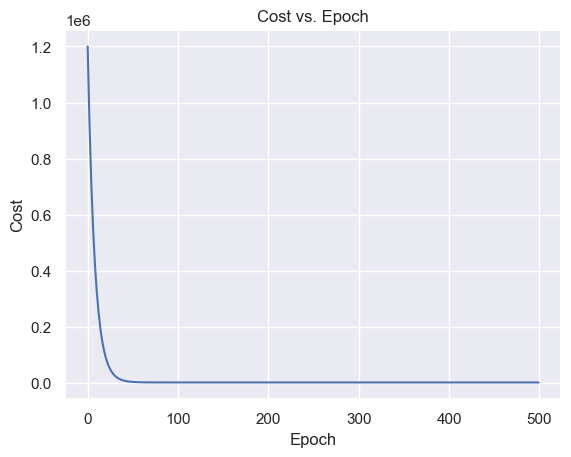

In [20]:
plt.plot(cost_history)
plt.title("Cost vs. Epoch")
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.show()

### Actual vs. Predict

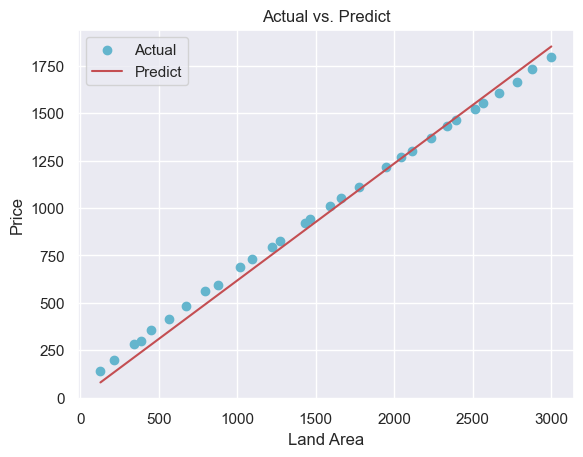

In [28]:
plt.scatter(x, y, label="Actual",c='c')
plt.plot(x, hypothesis(x, a1, a2, b), label="Predict", c='r')
plt.title("Actual vs. Predict")
plt.xlabel("Land Area")
plt.ylabel("Price")
plt.legend()
plt.show()

### Predicted

In [37]:
def predict(area):
    return b + a1 * area + a2 * np.sqrt(area)

area = 1500

print(f"For {area} m2, we predicted that the price is around: $ {predict(area)*1000:.4f}")

For 1500 m2, we predicted that the price is around: $ 925756.2326
